![Screenshot_25z0](Screenshot_25z0.png)

# Source: 
![Screenshot_253](Screenshot_253.png)
## [Titanic-Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data).

# Problem Definition: 
![Screenshot_245](Screenshot_245.png)

# Design Architecture: 

![Screenshot_244](Screenshot_244.png)

## Import the required packages
![Screenshot_254](Screenshot_254.png)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

## Read the data set
![Screenshot_254](Screenshot_254.png)

In [36]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## EDA: Exploratory Data Analysis
![Screenshot_254](Screenshot_254.png)

In [37]:
print(f'Training Data Shape: {train_data.shape}, \nTesting Data Shape: {test_data.shape}')

Training Data Shape: (891, 12), 
Testing Data Shape: (418, 11)


### Hence, our ship's log reveals the structure of our data:

- #### 891 passengers in the training set with 12 features
- #### 418 passengers in the test set with 11 features

In [38]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

# Preprocess Dataset
![Screenshot_253](Screenshot_253.png)

In [39]:
# Checking for missing values
print("Missing values in Training Data")
print(train_data.isnull().sum())
print("\nMissing values in Testing Data")
print(test_data.isnull().sum())

Missing values in Training Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Testing Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Handling missing values
![Screenshot_254](Screenshot_254.png)

In [40]:
# train
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace = True)
# test
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

![Screenshot_248](Screenshot_248.png)

## Converting categorical data into booleans
![Screenshot_254](Screenshot_254.png)

In [41]:
train_data['Sex'].replace(['female', 'male'], [0, 1], inplace = True)
test_data['Sex'].replace(['female', 'male'], [0, 1], inplace = True)

## Dropping unnecessary columns from the data set
![Screenshot_254](Screenshot_254.png)

In [42]:
train_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)
test_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)

## Previewing the data set after Preprocessing
![Screenshot_254](Screenshot_254.png)

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


### PassengerId, Survived, Sex, Age, Fare - self-explanatory
### Pclass - passenger class. 
### SibSp - how many siblings & spouses of the passenger aboard the Titanic. 
### Parch - how many children & parents of the passenger aboard the Titanic.

In [44]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


# Develop the ML model
![Screenshot_253](Screenshot_253.png)

## Create X & Y variables
![Screenshot_254](Screenshot_254.png)

In [45]:
x = train_data.drop(columns = 'Survived')
y = train_data['Survived']

## Checking for Multicollinearity
![Screenshot_254](Screenshot_254.png)

<AxesSubplot: >

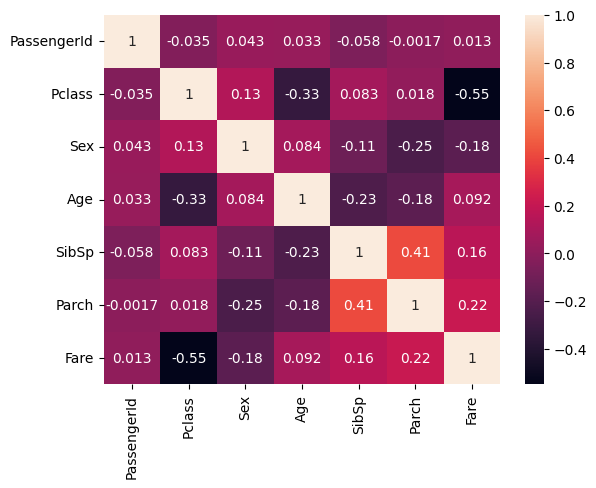

In [46]:
#No Multicollinearity
#It occurs when the independent variables show moderate to high correlation. In a model with correlated variables, it becomes a tough task to figure out the true relationship of predictors with response variable. In other words, it becomes difficult to find out which independent variable is actually contributing to predict the response variable.

#Example: Colin loves watching TV while munching on chips. What would have a greater impact on his happiness. Having chips or watching television ? That's difficult to determine because the moment he starts watching TV, he also starts eating chips!

corr = x.corr(method = 'pearson')
sns.heatmap(data = corr, annot = True)

## Splitting the data into Train and Test
![Screenshot_254](Screenshot_254.png)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = None, test_size = .30)

In [48]:
print(f'x: {x.shape}, y:{y.shape}')
print(f'X_train: {X_train.shape}, y_train:{y_train.shape}')
print(f'X_test: {X_test.shape}, y_test:{y_test.shape}')

x: (891, 7), y:(891,)
X_train: (623, 7), y_train:(623,)
X_test: (268, 7), y_test:(268,)


# Using Logistic Regression
![Screenshot_253](Screenshot_253.png)
## The survivability output will be either 1 or 0 based on whether a passenger survived the Titanic disaster or not

In [49]:
# Logistics Regression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1])

## With our Logistic Regression Model, we will now predict the Survivability on 418 passengers given on the Test Data Test!
![Screenshot_254](Screenshot_254.png)

In [51]:
from sklearn.linear_model import LogisticRegression

# Prepare the features for the model
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("Survived", axis=1, errors='ignore')  # Updated line

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict survivability on the test dataset
predictions = model.predict(X_test)

# Adding predictions to the test_data DataFrame
test_data['Survived'] = predictions

prediction_data = test_data.copy()
#X_test_sample_with_predictions['predicted_charges'] = predicted_original_values

# Save the combined DataFrame to an Excel file
prediction_data.to_excel("titanic_survivors.xlsx", index=False)

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,1,34.5,0,0,7.8292,0
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,0
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,1


# Evaluate the model
![Screenshot_253](Screenshot_253.png)

## Prediction Metrics
![Screenshot_254](Screenshot_254.png)

In [424]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate Pseduo-R2 (as there is no "R2" for Logistic Regression)
pseudo_r2 = roc_auc_score(y_test, y_pred)

# Display the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Pseudo_R2 Score: {pseudo_r2}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.8134328358208955
Precision: 0.819047619047619
Recall: 0.7350427350427351
F1 Score: 0.7747747747747747
Pseudo_R2 Score: 0.8046074602365995
Confusion Matrix:
 [[132  19]
 [ 31  86]]


## Confusion Matrix
![Screenshot_254](Screenshot_254.png)

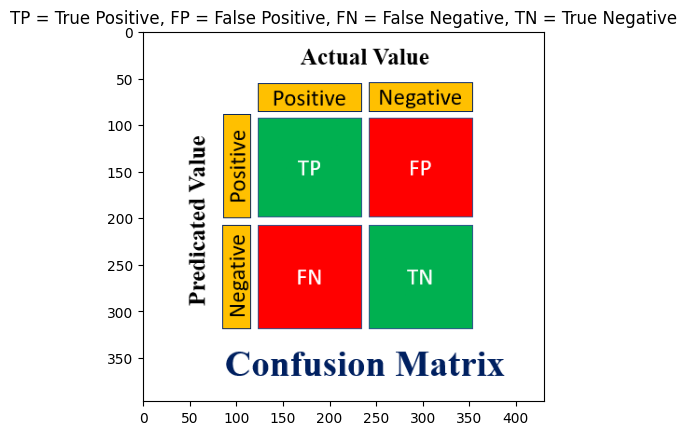

In [421]:
from matplotlib import image as img
plt.title("TP = True Positive, FP = False Positive, FN = False Negative, TN = True Negative") 
image = img.imread("confusion_matrix.png")
plt.imshow(image)
plt.show()

<AxesSubplot: >

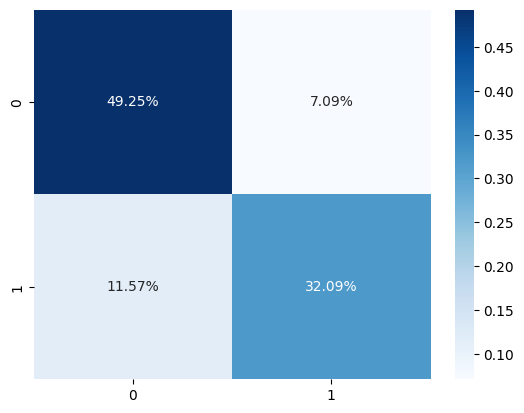

In [422]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Interpretation of the Logistic Regression Model's Performance
![Screenshot_252](Screenshot_252.png)

## Accuracy Score: 81.34%
### • This indicates that the model correctly predicts whether a passenger survived or not 81.34% of the time. It's a good measure of the model's overall performance.
![Screenshot_254](Screenshot_254.png)
## Precision Score: 81.90%
### • Precision (or specificity) measures the accuracy of positive predictions. In this context, it means that when the model predicts a passenger survived, it is correct 81.90% of the time. High precision relates to a low false positive rate.
![Screenshot_254](Screenshot_254.png)
## Recall Score: 73.50%
### • Recall (or sensitivity) measures the ability of the model to find all the relevant cases (all the actual survivors). The model correctly identifies 73.50% of all actual survivors. This suggests there's room for improvement in capturing more true positives.
### • The recall score is beneficial for scenarios where missing a positive case (failing to identify a survivor) is costly.
![Screenshot_254](Screenshot_254.png)
## F1 Score: 77.48%
### • It is a weighted average of precision and recall. At 77.48%, it suggests the model has a good balance between precision and recall, though there's still room for improvement, especially in improving recall without significantly reducing precision.
![Screenshot_254](Screenshot_254.png)
## Confusion Matrix: [[132, 19], [31, 86]]
# The confusion matrix provides a detailed breakdown:
### - True Positives (TP): 132 (correctly predicted survivors)
### - False Positives (FP): 19 (incorrectly predicted as survivors)
### - False Negatives (FN): 31 (incorrectly predicted as non-survivors)
### - True Negatives (TN): 86 (correctly predicted non-survivors)
![Screenshot_253](Screenshot_253.png)
# Overall, the model performs well in identifying survivors, with a strong emphasis on recall. 
### The logistic regression model shows a strong ability to predict survival on the Titanic, with high accuracy and precision. However, there's a notable number of false negatives, indicating that the model is more conservative in predicting survival. Improving recall could help the model capture more true survivors, potentially at the expense of making more false positive errors.

![Screenshot_250FF](Screenshot_250FF.png)